In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Leitura dos dados

In [3]:
df = pd.read_csv("drive/MyDrive/csvs/diabetes_prediction_dataset.csv")
columns = df.columns

# Vizualizando os dados

**Classe:** Diabetes

**Atributos**: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Conversão de valores categóricos para numéricos

In [5]:
target = ['gender', 'smoking_history']
for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

In [26]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Verificando se há missing values

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Normalizando o dataframe

In [7]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm, columns=columns)

# Definição da classe e das features

In [8]:
x = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = dataset['diabetes']

# Divisão dos dados em conjuntos de treinamento e teste

2/3 dos dados para treino e 1/3 para teste

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/3, random_state=42)

# KNN

Números ímpares para evitar empates

In [10]:
kValues = [i for i in range(1, 20, 2)]

Validação cruzada para achar o melhor K

In [11]:
kAccScores = []
for k in kValues:
  KNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  cvScores = cross_val_score(KNN, xTrain, yTrain, cv=5, scoring='accuracy')
  kAccScores.append(cvScores.mean())

In [20]:
optimalK = kValues[kAccScores.index(max(kAccScores))]
print(f'Optimal K: {optimalK}')

Optimal K: 11


Checando as acurácias



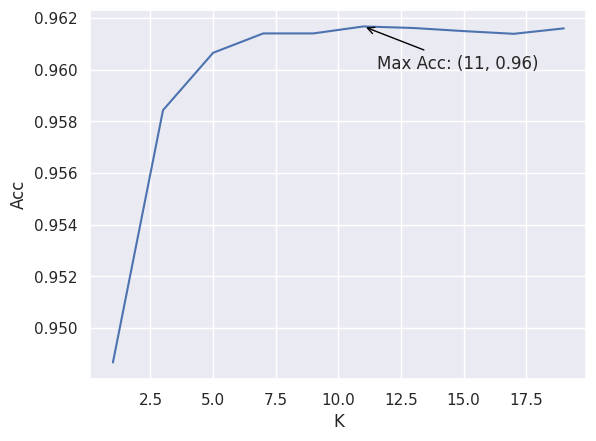

In [18]:
plt.plot(kValues, kAccScores)
plt.xlabel('K')
plt.ylabel('Acc')

max_y = np.max(kAccScores)
max_x = kValues[np.argmax(kAccScores)]

plt.annotate(f'Max Acc: ({max_x}, {max_y:.2f})', xy=(kValues[kAccScores.index(max_y)], max_y), xytext=(10, -20), textcoords='offset points', ha='left', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

plt.show()

KNN com o k ótimo

In [43]:
KNN = KNeighborsClassifier(n_neighbors=optimalK).fit(xTrain, yTrain)
yPredKNN = KNN.predict(xTest)

In [44]:
accKNN = accuracy_score(yTest, yPredKNN)
print(f'Accuracy: {accKNN}')

Accuracy: 0.9620807583848323


Matriz de confusão

<Axes: >

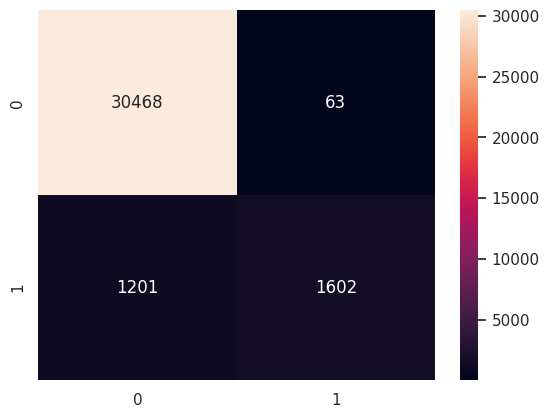

In [45]:
cm = confusion_matrix(yTest, KNN.predict(xTest))
sns.heatmap(cm, annot=True, fmt="d")

# Seleção de Recursos Univariados

Encontrar as 5 melhores features

In [32]:
features = SelectKBest(chi2, k=5).fit(xTrain, yTrain)

In [33]:
for index in range(len(features.scores_)):
  print(f'{xTrain.columns[index]}: {features.scores_[index]}')

gender: 20.393287619401715
age: 676.7978952958124
hypertension: 2365.4064984885995
heart_disease: 1880.62828338311
smoking_history: 192.1434963722035
bmi: 87.52560535122903
HbA1c_level: 1123.44628458975
blood_glucose_level: 1547.148654995214


In [34]:
xTrain2 = features.transform(xTrain)
xTest2 = features.transform(xTest)

In [39]:
KNN = KNeighborsClassifier(n_neighbors=optimalK).fit(xTrain2, yTrain)
yPredKNN = KNN.predict(xTest2)

In [41]:
accKNN = accuracy_score(yTest, yPredKNN)
print(f'Accuracy: {accKNN}')

Accuracy: 0.9685306293874123


Matriz de confusão

<Axes: >

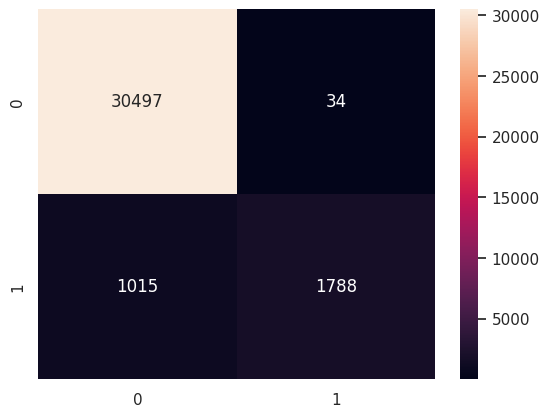

In [42]:
cm = confusion_matrix(yTest, KNN.predict(xTest2))
sns.heatmap(cm, annot=True, fmt="d")